In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
import statsmodels.api as sm
from scipy import stats

 In the Little's MCAR test, we access functions from the SciPy library that are essential for statistical analysis involving the chi-square distribution. Specifically, the `chi2` module provides the `sf` (survival function) method, which calculates the p-value for the chi-square statistic obtained from the test. This p-value quantifies the probability of observing a chi-square statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis (that the data is missing completely at random) is true. This helps determine whether the missing data mechanism in the dataset aligns with the MCAR assumption.

In [2]:
df=pd.read_csv('Airbnb_Open_Data.csv')
missing=df.isnull().sum()
print(missing)

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<ipython-input-2-60a62ce7283e>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Airbnb_Open_Data.csv')


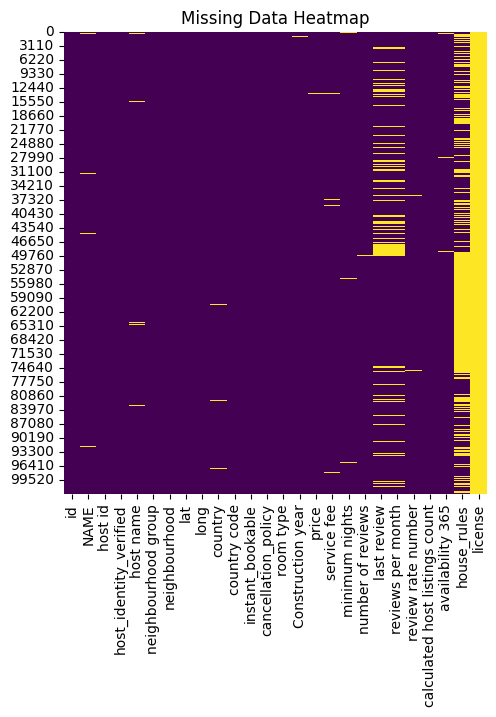

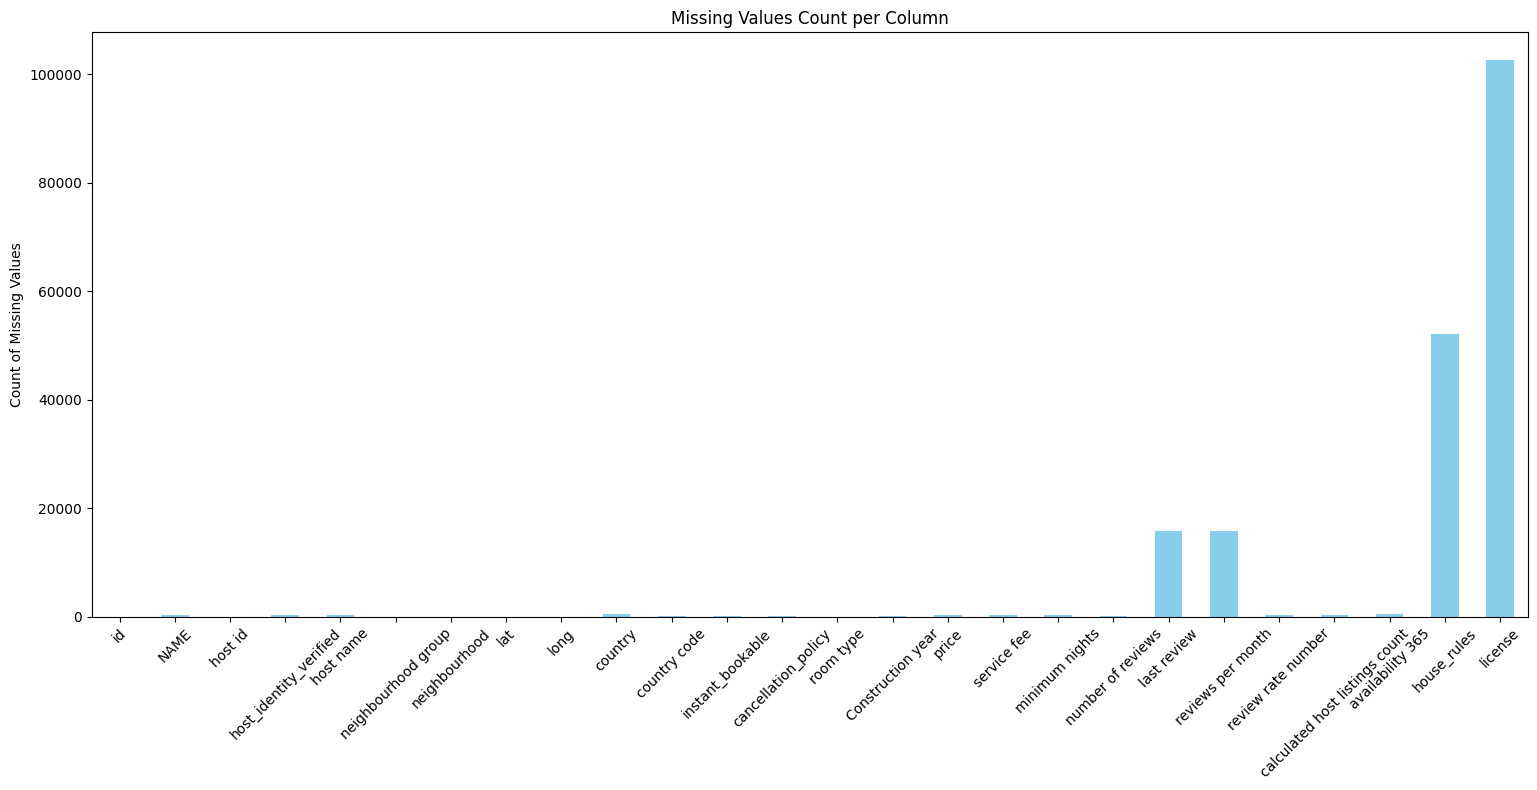

In [3]:


def visualize_missingness(data):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

    plt.figure(figsize=(30,8))
    plt.subplot(1, 2, 2)
    missing_count = data.isnull().sum()
    missing_count.plot(kind='bar', color='skyblue')
    plt.title('Missing Values Count per Column')
    plt.ylabel('Count of Missing Values')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

data = df

visualize_missingness(data)

In [ ]:
!pip install scikit-learn --upgrade # Upgrade scikit-learn to the latest version
!pip install scikit-learn --force-reinstall

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.4 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing 

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def little_mcar_test(data):
    n = len(data)
    groups = []

    for col in data.columns:
        mask = data[col].isnull()
        if mask.any():
            groups.append(mask.astype(int).values.reshape(-1, 1))

    if len(groups) == 0:
        raise ValueError("No missing data found.")

    r = np.concatenate(groups, axis=1)
    group_stats = r.T @ r
    m = len(groups)
    df = (n - 1) * m
    chi2_stat = group_stats.trace()
    p_value = chi2.sf(chi2_stat, df)

    return {"chi2_stat": chi2_stat, "degrees_of_freedom": df, "p_value": p_value}

# Example usage with a DataFrame `df`:
result = little_mcar_test(df)
print(f"Chi-square statistic: {result['chi2_stat']}")
print(f"Degrees of freedom: {result['degrees_of_freedom']}")
print(f"P-value: {result['p_value']}")


Chi-square statistic: 190769
Degrees of freedom: 2359754
P-value: 1.0


The Little’s MCAR test was conducted to assess whether the missing data in the dataset can be considered missing completely at random (MCAR). The test yielded a chi-square statistic of 190,769 with 2,359,754 degrees of freedom. The corresponding p-value was 1.0, indicating that there is no significant deviation from the null hypothesis. This high p-value suggests that the observed pattern of missing data is consistent with the assumption that the data is missing completely at random, and thus, there is no substantial evidence to reject the MCAR hypothesis.